In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [34]:
training_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/train'
test_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/test'
validate_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/validation'

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1./255,
                                      )

train_generator = train_datagen.flow_from_directory(
    training_dir, 
    target_size = (150,150), 
    class_mode = 'binary',
    batch_size = 20
)

validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size =(150,150),
    class_mode = 'binary',
    batch_size = 20

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
model = models.Sequential([
                          
                          keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)),
                          keras.layers.MaxPool2D(2,2),
                          
                          keras.layers.Conv2D(62,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                           
                          keras.layers.Conv2D(128,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          
                          keras.layers.Conv2D(128,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(2,2),

                          keras.layers.Flatten(),
                          keras.layers.Dropout((0.5)),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
                          
]
    
)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 62)        17918     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 62)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       71552     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [47]:
trained_model = model.fit(train_generator,validation_data=validate_generator,steps_per_epoch=100,epochs=100,validation_steps=10)

Epoch 1/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6936 - acc: 0.5135 - val_loss: 0.6790 - val_acc: 0.6350
Epoch 2/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6867 - acc: 0.5430 - val_loss: 0.6826 - val_acc: 0.5350
Epoch 3/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6775 - acc: 0.5765 - val_loss: 0.6802 - val_acc: 0.5300
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6688 - acc: 0.5775 - val_loss: 0.6250 - val_acc: 0.7000
Epoch 5/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6549 - acc: 0.6135 - val_loss: 0.6801 - val_acc: 0.5850
Epoch 6/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6425 - acc: 0.6230 - val_loss: 0.7138 - val_acc: 0.5250
Epoch 7/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6299 - acc: 0.6345 - val_loss: 0.5975 - val_acc: 0.6800
Epoch 8/100
100/100 [===========================

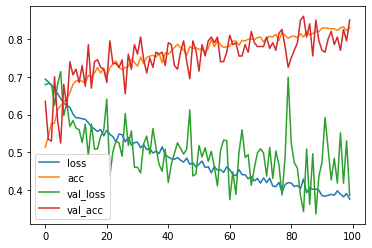

In [48]:
pd.DataFrame(trained_model.history).plot()

In [49]:
model.save('/content/drive/MyDrive/tensorflow/Untitled Folder/v2.h5')

In [53]:


test_generator = validate_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    class_mode = 'binary',
    batch_size = 20

)

Found 1010 images belonging to 2 classes.


In [54]:
model.evaluate(test_generator,steps =50)

50/50 [==============================] - 298s 6s/step - loss: 0.4446 - acc: 0.8150


[0.44459444284439087, 0.8149999976158142]